## Word embeddings in TensorFlow

In [208]:
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords

### Load review document

In [210]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [211]:
df=load_doc('review.txt')

In [212]:
df

'Part of the Marvel Comics universe, but proudly sitting outside the Marvel Cinematic Universe, 20th Century Fox’s Deadpool sequel offers a continuation of the first’s cheeky fourth-wall breaking and edgy, look-at-me violence. For those who need catching up, Wade Wilson aka Deadpool (Ryan Reynolds) is a burns victim with a bad attitude and worse jokes whose superpower is superfast healing, rendering him basically indestructible. A personal tragedy involving his girlfriend (who, in a juvenile romantic gesture, presents him with her IUD in a box) puts him on a redemption arc. Teaming up with cyborg time-traveller Cable (Josh Brolin) and lucky charm Domino (Zazie Beetz) among others, Deadpool’s team sets out to protect firestarter Russell (Kiwi actor Julian Dennison), a teen mutant of the X-Men variety. From its smug but dated pop culture references (there’s a recurring joke about dubstep, hinged on the 2012 Skrillex track Bangarang) to the frantic, barely comprehensible cutting, there’s 

### Clean and tokenize

In [213]:
def clean_doc(doc):
    doc = doc.lower()
    doc = doc.replace(',', '')
    doc = doc.replace('(', '')
    doc = doc.replace(')', '')
    return doc

In [215]:
df = clean_doc(df)

In [216]:
df

'part of the marvel comics universe but proudly sitting outside the marvel cinematic universe 20th century fox’s deadpool sequel offers a continuation of the first’s cheeky fourth-wall breaking and edgy look-at-me violence. for those who need catching up wade wilson aka deadpool ryan reynolds is a burns victim with a bad attitude and worse jokes whose superpower is superfast healing rendering him basically indestructible. a personal tragedy involving his girlfriend who in a juvenile romantic gesture presents him with her iud in a box puts him on a redemption arc. teaming up with cyborg time-traveller cable josh brolin and lucky charm domino zazie beetz among others deadpool’s team sets out to protect firestarter russell kiwi actor julian dennison a teen mutant of the x-men variety. from its smug but dated pop culture references there’s a recurring joke about dubstep hinged on the 2012 skrillex track bangarang to the frantic barely comprehensible cutting there’s very little to enjoy her

### Create vocabulary

In [217]:
words = []
df_cpy = df.replace('.', '')
for word in df_cpy.split():
    if word not in ['.',',']: 
        words.append(word)

In [180]:
words = set(words) # remove duplicates
word2int = {}
int2word = {}
vocab_size = len(words) #total number of unique words

In [181]:
vocab_size

139

In [182]:
words

{'2012',
 '20th',
 'a',
 'about',
 'actor',
 'aka',
 'among',
 'and',
 'arc',
 'attitude',
 'bad',
 'bangarang',
 'barely',
 'basically',
 'beetz',
 'both',
 'box',
 'breaking',
 'brightness',
 'brolin',
 'burns',
 'but',
 'cable',
 'catching',
 'century',
 'charm',
 'cheeky',
 'cinematic',
 'clinging',
 'comics',
 'comprehensible',
 'continuation',
 'culture',
 'cutting',
 'cyborg',
 'dated',
 'deadpool',
 'deadpool’s',
 'dennison',
 'dispensing',
 'domino',
 'dubstep',
 'edgy',
 'enjoy',
 'fan',
 'firestarter',
 'first’s',
 'for',
 'fourth-wall',
 'fox’s',
 'franchise’s',
 'frantic',
 'from',
 'gesture',
 'girlfriend',
 'healing',
 'her',
 'here',
 'him',
 'hinged',
 'his',
 'imagined',
 'in',
 'indestructible',
 'involving',
 'is',
 'its',
 'iud',
 'joke',
 'jokes',
 'josh',
 'julian',
 'juvenile',
 'kiwi',
 'little',
 'look-at-me',
 'lucky',
 'makes',
 'marvel',
 'mcu',
 'mutant',
 'need',
 'of',
 'offers',
 'on',
 'others',
 'out',
 'outside',
 'pandering',
 'part',
 'personal',
 

In [183]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [218]:
word2int['violence']

1

In [219]:
word2int['culture']

49

In [220]:
int2word[3]

'iud'

In [221]:
int2word[30]

'sitting'

In [184]:
# raw sentences is a list of sentences.
raw_sentences = df.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [185]:
sentences

[['part',
  'of',
  'the',
  'marvel',
  'comics',
  'universe',
  'but',
  'proudly',
  'sitting',
  'outside',
  'the',
  'marvel',
  'cinematic',
  'universe',
  '20th',
  'century',
  'fox’s',
  'deadpool',
  'sequel',
  'offers',
  'a',
  'continuation',
  'of',
  'the',
  'first’s',
  'cheeky',
  'fourth-wall',
  'breaking',
  'and',
  'edgy',
  'look-at-me',
  'violence'],
 ['for',
  'those',
  'who',
  'need',
  'catching',
  'up',
  'wade',
  'wilson',
  'aka',
  'deadpool',
  'ryan',
  'reynolds',
  'is',
  'a',
  'burns',
  'victim',
  'with',
  'a',
  'bad',
  'attitude',
  'and',
  'worse',
  'jokes',
  'whose',
  'superpower',
  'is',
  'superfast',
  'healing',
  'rendering',
  'him',
  'basically',
  'indestructible'],
 ['a',
  'personal',
  'tragedy',
  'involving',
  'his',
  'girlfriend',
  'who',
  'in',
  'a',
  'juvenile',
  'romantic',
  'gesture',
  'presents',
  'him',
  'with',
  'her',
  'iud',
  'in',
  'a',
  'box',
  'puts',
  'him',
  'on',
  'a',
  'rede

### Prepare training data

In [186]:
WINDOW_SIZE = 2

In [187]:
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])


In [188]:
data

[['part', 'of'],
 ['part', 'the'],
 ['of', 'part'],
 ['of', 'the'],
 ['of', 'marvel'],
 ['the', 'part'],
 ['the', 'of'],
 ['the', 'marvel'],
 ['the', 'comics'],
 ['marvel', 'of'],
 ['marvel', 'the'],
 ['marvel', 'comics'],
 ['marvel', 'universe'],
 ['comics', 'the'],
 ['comics', 'marvel'],
 ['comics', 'universe'],
 ['comics', 'but'],
 ['universe', 'marvel'],
 ['universe', 'comics'],
 ['universe', 'but'],
 ['universe', 'proudly'],
 ['but', 'comics'],
 ['but', 'universe'],
 ['but', 'proudly'],
 ['but', 'sitting'],
 ['proudly', 'universe'],
 ['proudly', 'but'],
 ['proudly', 'sitting'],
 ['proudly', 'outside'],
 ['sitting', 'but'],
 ['sitting', 'proudly'],
 ['sitting', 'outside'],
 ['sitting', 'the'],
 ['outside', 'proudly'],
 ['outside', 'sitting'],
 ['outside', 'the'],
 ['outside', 'marvel'],
 ['the', 'sitting'],
 ['the', 'outside'],
 ['the', 'marvel'],
 ['the', 'cinematic'],
 ['marvel', 'outside'],
 ['marvel', 'the'],
 ['marvel', 'cinematic'],
 ['marvel', 'universe'],
 ['cinematic', 'th

In [223]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [190]:
x_train = []
y_train = [] 

In [191]:
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))


In [226]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
# convert encoded values to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [228]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [229]:
print(x_train.shape, y_train.shape)

(696, 139) (696, 139)


### Create model

In [230]:
#  placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


In [231]:
EMBEDDING_DIM = 5 
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [232]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

### Train model

In [233]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

In [236]:
#loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))


In [237]:
#training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [238]:
n_iters = 100


In [239]:
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  7.940121
loss is :  7.830424
loss is :  7.736653
loss is :  7.655984
loss is :  7.586188
loss is :  7.525465
loss is :  7.472349
loss is :  7.425637
loss is :  7.3843265
loss is :  7.3475876
loss is :  7.3147254
loss is :  7.285155
loss is :  7.2583876
loss is :  7.2340145
loss is :  7.211688
loss is :  7.1911173
loss is :  7.172055
loss is :  7.154291
loss is :  7.1376524
loss is :  7.121985
loss is :  7.107166
loss is :  7.0930834
loss is :  7.0796475
loss is :  7.066778
loss is :  7.054408
loss is :  7.0424805
loss is :  7.0309453
loss is :  7.019759
loss is :  7.008886
loss is :  6.9982944
loss is :  6.9879556
loss is :  6.977846
loss is :  6.967946
loss is :  6.9582367
loss is :  6.948704
loss is :  6.9393296
loss is :  6.9301057
loss is :  6.921019
loss is :  6.9120607
loss is :  6.903224
loss is :  6.8944974
loss is :  6.8858795
loss is :  6.8773613
loss is :  6.868938
loss is :  6.8606043
loss is :  6.8523564
loss is :  6.8441906
loss is :  6.8361044
loss is :  6.828

In [240]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.02516905 -0.07527118  0.13646963 -0.21629098 -0.4344073 ]
 [-1.2618273  -0.42649975  0.63854575 -0.58919895  0.3257008 ]
 [-0.22785571 -1.306967    2.1356564  -0.8965971  -0.02756429]
 [-0.55108225 -0.6448392   1.2999579   0.3687485   0.504725  ]
 [ 0.8774794   0.630295    0.6394905  -1.1005563   0.0311646 ]
 [-0.86400187 -0.57381094  0.43882084 -0.4217933  -0.2285944 ]
 [ 0.44886196 -1.3465447  -0.16373077  0.58532333  0.85008955]
 [-0.26469243  0.98307544  0.22165939 -1.6175182  -1.7531868 ]
 [-0.9930912  -0.11850114 -0.89224136 -0.6602655  -0.09963074]
 [-0.2953356   1.4171071   0.26213375 -0.4837944   1.2636244 ]
 [-0.8076127   1.0160053   0.48663414 -0.85409147 -2.0927    ]
 [ 1.1304648  -1.2172911  -0.40695956 -0.5181908  -0.587418  ]
 [ 0.3639671  -1.6832762   1.0636145   0.8416153   1.3371742 ]
 [ 0.31408736  0.08936216 -0.38259882  0.01513182 -0.98938006]
 [-0.16148259  0.19270606  0.24273919  0.13432509  0.8131271 ]
 [-0.6917368   1.1016898   0.35830796  0.29370257  0.14

In [201]:
vectors = sess.run(W1 + b1)

In [241]:
print(vectors)

[[ 0.88100797  0.4731015 ]
 [-0.9898189   0.14233275]
 [ 0.38678995  0.92216784]
 [-0.8377658   0.5460296 ]
 [-0.80353254 -0.595261  ]
 [-0.96834946  0.24959868]
 [-0.841225    0.5406851 ]
 [ 0.22185011  0.97508085]
 [-0.9876713  -0.1565416 ]
 [-0.96596414 -0.2586762 ]
 [ 0.85358226 -0.5209582 ]
 [ 0.7606291  -0.6491866 ]
 [-0.9660009  -0.2585387 ]
 [-0.94316465 -0.33232582]
 [-0.9674345   0.25312164]
 [ 0.3293732   0.9441998 ]
 [ 0.96613276 -0.25804523]
 [-0.7493523   0.66217154]
 [ 0.49204764  0.8705683 ]
 [ 0.98008955 -0.19855614]
 [ 0.46431392 -0.88567066]
 [-0.2288639  -0.9734584 ]
 [-0.92042416 -0.39092115]
 [-0.95239985 -0.30485162]
 [-0.6935552   0.7204035 ]
 [ 0.79896814 -0.60137343]
 [ 0.53052884  0.8476669 ]
 [-0.75646347  0.654036  ]
 [-0.7979153   0.6027697 ]
 [-0.9691805  -0.24635151]
 [-0.3753797  -0.9268711 ]
 [-0.9945554   0.10420926]
 [-0.9993506  -0.03603286]
 [ 0.261206   -0.9652831 ]
 [-0.09717163  0.9952676 ]
 [-0.47245735 -0.8813535 ]
 [-0.8722251   0.48910463]
 

In [242]:
print(vectors[ word2int['culture'] ])

[0.01696357 0.9998561 ]


In [244]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [245]:
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [247]:
print(int2word[find_closest(word2int['culture'], vectors)])
print(int2word[find_closest(word2int['violence'], vectors)])

both
self-referential


In [248]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

In [205]:
from sklearn import preprocessing

In [206]:
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

In [207]:
vectors

array([[ 0.88100797,  0.4731015 ],
       [-0.9898189 ,  0.14233275],
       [ 0.38678995,  0.92216784],
       [-0.8377658 ,  0.5460296 ],
       [-0.80353254, -0.595261  ],
       [-0.96834946,  0.24959868],
       [-0.841225  ,  0.5406851 ],
       [ 0.22185011,  0.97508085],
       [-0.9876713 , -0.1565416 ],
       [-0.96596414, -0.2586762 ],
       [ 0.85358226, -0.5209582 ],
       [ 0.7606291 , -0.6491866 ],
       [-0.9660009 , -0.2585387 ],
       [-0.94316465, -0.33232582],
       [-0.9674345 ,  0.25312164],
       [ 0.3293732 ,  0.9441998 ],
       [ 0.96613276, -0.25804523],
       [-0.7493523 ,  0.66217154],
       [ 0.49204764,  0.8705683 ],
       [ 0.98008955, -0.19855614],
       [ 0.46431392, -0.88567066],
       [-0.2288639 , -0.9734584 ],
       [-0.92042416, -0.39092115],
       [-0.95239985, -0.30485162],
       [-0.6935552 ,  0.7204035 ],
       [ 0.79896814, -0.60137343],
       [ 0.53052884,  0.8476669 ],
       [-0.75646347,  0.654036  ],
       [-0.7979153 ,

['part', 'of', 'the', 'marvel', 'comics', 'universe', 'but', 'proudly', 'sitting', 'outside', 'the', 'marvel', 'cinematic', 'universe', '20th', 'century', 'fox’s', 'deadpool', 'sequel', 'offers', 'a', 'continuation', 'of', 'the', 'first’s', 'cheeky', 'fourth-wall', 'breaking', 'and', 'edgy', 'look-at-me', 'violence', 'for', 'those', 'who', 'need', 'catching', 'up', 'wade', 'wilson', 'aka', 'deadpool', 'ryan', 'reynolds', 'is', 'a', 'burns', 'victim', 'with', 'a', 'bad', 'attitude', 'and', 'worse', 'jokes', 'whose', 'superpower', 'is', 'superfast', 'healing', 'rendering', 'him', 'basically', 'indestructible', 'a', 'personal', 'tragedy', 'involving', 'his', 'girlfriend', 'who', 'in', 'a', 'juvenile', 'romantic', 'gesture', 'presents', 'him', 'with', 'her', 'iud', 'in', 'a', 'box', 'puts', 'him', 'on', 'a', 'redemption', 'arc', 'teaming', 'up', 'with', 'cyborg', 'time-traveller', 'cable', 'josh', 'brolin', 'and', 'lucky', 'charm', 'domino', 'zazie', 'beetz', 'among', 'others', 'deadpool’s

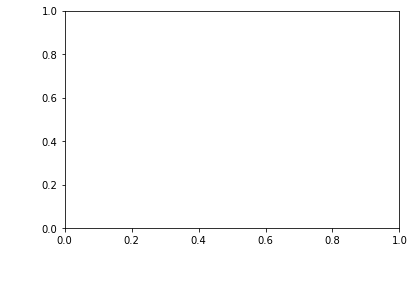

In [250]:
fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()